In [1]:
#import dependencies
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h6>Get the Dataset</h6>

In [2]:
#read .csv file and create a DataFrame
df=pd.read_csv("kiva_loans_20181016.csv")
df.head()

,id,funded_amount,loan_amount,diff_funded_loan,status,activity,sector,use,country_code,country,currency,lender_count,term_in_months,tags,gender,borrower_genders,repayment_interval,date
0,653051,300,300,0,1,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,PKR,12,12,NaN,female,female,irregular,1/1/14
1,653053,575,575,0,1,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,PKR,14,11,NaN,group,"female, female",irregular,1/1/14
2,653068,150,150,0,1,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,INR,6,43,"user_favorite, user_favorite",female,female,bullet,1/1/14
3,653063,200,200,0,1,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,PKR,8,11,NaN,female,female,irregular,1/1/14
4,653084,400,400,0,1,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,PKR,16,14,NaN,female,female,monthly,1/1/14


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 18 columns):
id                    671205 non-null int64
funded_amount         671205 non-null int64
loan_amount           671205 non-null int64
diff_funded_loan      671205 non-null int64
status                671205 non-null int64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
currency              671205 non-null object
lender_count          671205 non-null int64
term_in_months        671205 non-null int64
tags                  499789 non-null object
gender                666984 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non-null object
dtypes: int64(7), object(11)
memory usage: 92.2+ MB


In [4]:
df2=df[["status", "use"]]

In [5]:
df2.head()

,status,use
0,1,"To buy seasonal, fresh fruits to sell."
1,1,to repair and maintain the auto rickshaw used ...
2,1,To repair their old cycle-van and buy another ...
3,1,to purchase an embroidery machine and a variet...
4,1,to purchase one buffalo.


In [6]:
#we need to remove rows with null values in the "use" column
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666973 entries, 0 to 671204
Data columns (total 2 columns):
status    666973 non-null int64
use       666973 non-null object
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<h6>Exploratory Data Analysis</h6>

In [7]:
pd.set_option('display.max_colwidth', -1)

In [8]:
df2.groupby("status").describe()

use          \
         count  unique   
status                   
0       47640   40064    
1       619333  391235   

                                                                                \
                                                                           top   
status                                                                           
0       to purchase improved farm inputs that will increase farm yield.          
1       to buy a water filter to provide safe drinking water for their family.   

              
        freq  
status        
0       180   
1       5197

In [9]:
df2.loc[(df2["use"]=="to buy a water filter to provide safe drinking water for their family.") & (df2["status"]==0)]

,status,use
664838,0,to buy a water filter to provide safe drinking water for their family.
665026,0,to buy a water filter to provide safe drinking water for their family.
665617,0,to buy a water filter to provide safe drinking water for their family.
665796,0,to buy a water filter to provide safe drinking water for their family.
665885,0,to buy a water filter to provide safe drinking water for their family.
665947,0,to buy a water filter to provide safe drinking water for their family.
666259,0,to buy a water filter to provide safe drinking water for their family.
667669,0,to buy a water filter to provide safe drinking water for their family.
667858,0,to buy a water filter to provide safe drinking water for their family.
667965,0,to buy a water filter to provide safe drinking water for their family.


In [10]:
df2["use_length"]=df2["use"].apply(len)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df2.head()

,status,use,use_length
0,1,"To buy seasonal, fresh fruits to sell.",39
1,1,to repair and maintain the auto rickshaw used in their business.,64
2,1,To repair their old cycle-van and buy another one to rent out as a source of income,83
3,1,to purchase an embroidery machine and a variety of new embroidery materials.,76
4,1,to purchase one buffalo.,24


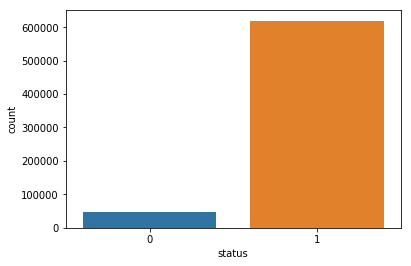

In [12]:
sns.countplot(x="status", data = df2)

(0, 300)

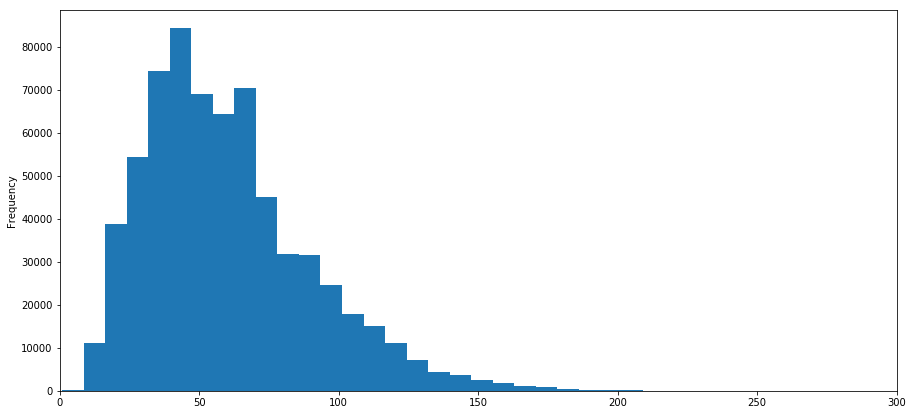

In [13]:
plt.figure(figsize=(15, 7))
df2["use_length"].plot.hist(bins=100)
plt.xlim(0,300)


In [14]:
df2["use_length"].describe()

count    666973.000000
mean     60.203888    
std      29.789431    
min      1.000000     
25%      38.000000    
50%      55.000000    
75%      76.000000    
max      772.000000   
Name: use_length, dtype: float64

In [15]:
#print the "use" description with max number of characters
l=df2[df2["use_length"]==772]["use"].iloc[0]
#print(l)
df.loc[df["use"]==l]


,id,funded_amount,loan_amount,diff_funded_loan,status,activity,sector,use,country_code,country,currency,lender_count,term_in_months,tags,gender,borrower_genders,repayment_interval,date
526686,1197187,4000,4000,0,1,Clothing,Clothing,"in the purchasing of best selling items currently out of stock due to no/low funds I will be able to introduce a steady flow of new merchandise and react to any ""new/IT"" items in the industry and offer my clients the same or like items at better prices than the major retailers/specialty stores. It will allow me to plan purchases by category and be able to react to consumer and market needs.This loan will allow me to have a bigger presence online, in social media ads and at trade fairs/shows and will help me build my brand, Lily's Clothiers. I will be able to buy into new categories at a higher margin which in turn, will help elevate my price points and propel me into another realm of the business - I can finally compete with local and online boutique retailers.",US,United States,USD,60,24,"user_favorite, #First Loan, #Parent, #Woman Owned Biz, #Biz Durable Asset, user_favorite, user_favorite, user_favorite, user_favorite, user_favorite, user_favorite",female,female,monthly,11/17/16


In [16]:
#print the "use" description with min number of characters
l=df2[df2["use_length"]==1]["use"].iloc[0]
print(l)
df.loc[df["use"]==l]

,id,funded_amount,loan_amount,diff_funded_loan,status,activity,sector,use,country_code,country,currency,lender_count,term_in_months,tags,gender,borrower_genders,repayment_interval,date
121644,772911,1350,1350,0,1,Fish Selling,Food,,CO,Colombia,COP,54,14,"user_favorite, #Woman Owned Biz, #Repeat Borrower",female,female,monthly,9/22/14


array([<matplotlib.axes._subplots.AxesSubplot object at 0x105198198>,
      dtype=object)

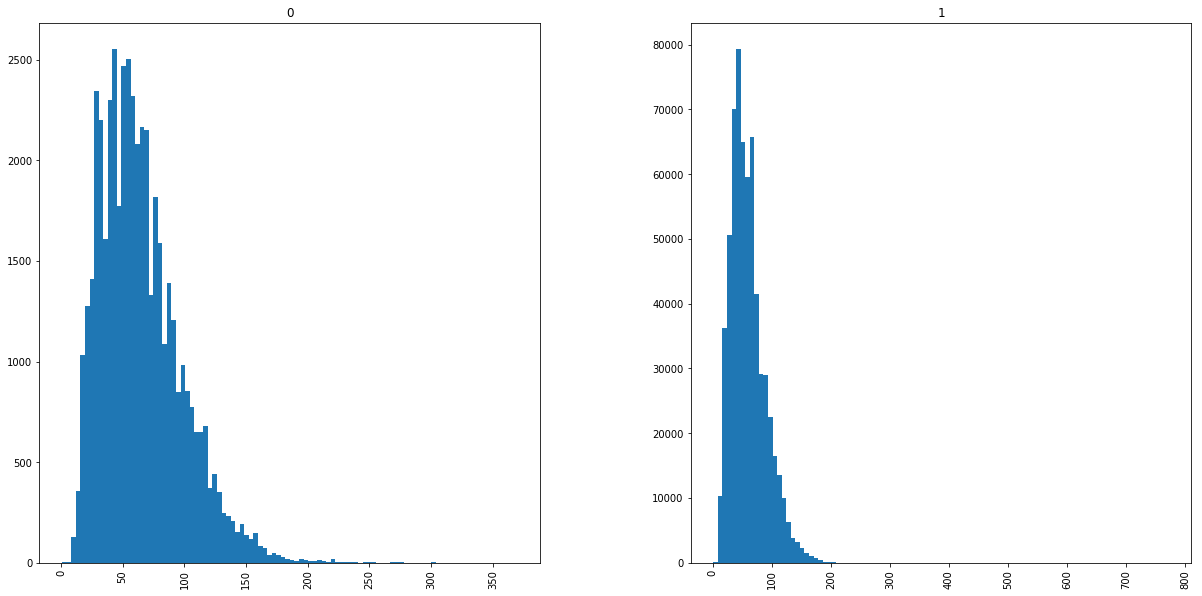

In [17]:
df2.hist(column='use_length', by='status', bins=100,figsize=(20,10))

<h3>NLP Classification</h3>

<h6>Bag of words</h6>

In [18]:
#we use the CountVectorizer to create vectors from the corpus.

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [19]:
#create feature/target
X=df2["use"]
y=df2["status"]


In [20]:
X= cv.fit_transform(X)
#X.shape

#[n_samples, n_features].

In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [23]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
#prediction and evaluation
prediction=nb.predict(X_test)

In [25]:
#create a confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
print(confusion_matrix(y_test, prediction))

[[  3030  11248]
 [ 11232 174582]]


In [27]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.21      0.21      0.21     14278
          1       0.94      0.94      0.94    185814

avg / total       0.89      0.89      0.89    200092



<h6>Creating a Data Pipeline adding  TF-IDF</h6>

In [28]:
#tf-idf weight is a statistical measure used to evaluate how important a word is to a document in a collection 
#or corpus. The importance increases proportionally to the number of times a word appears in the document 
#but is offset by the frequency of the word in the corpus. 
#The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down
#the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative 
#than features that occur in a small fraction of the training corpus.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.pipeline import Pipeline



In [30]:
#create a pipeline with the following steps: CountVectorizer(), TfidTransformer(), MultinominalNB()
pipeline = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB())  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [31]:
X=df2["use"]
y=df2["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [33]:
#prediction and evaluation
prediction=pipeline.predict(X_test)

In [34]:
#create a confusion matrix and classification report
print(confusion_matrix(y_test, prediction))

[[   344  13934]
 [   608 185206]]


In [35]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.36      0.02      0.05     14278
          1       0.93      1.00      0.96    185814

avg / total       0.89      0.93      0.90    200092



In [36]:
dfp = pd.DataFrame({"Prediction": prediction, "Actual": y_test})

In [37]:
dfp.head()

,Actual,Prediction
16913,1,1
384448,1,1
473140,1,1
285000,1,1
563968,1,1


In [38]:
#true positive
print(df.iloc[16913,7])
print(df.iloc[384448,7])
print(df.iloc[563968,7])

purchase stock of Mantle Anchor
to buy new tools that will make his work easier.
to buy stock of clothing for sale.


In [39]:
dfn=dfp.loc[dfp["Prediction"]==False]


In [40]:
dfn.head(20)

,Actual,Prediction
533856,1,0
249829,0,0
107508,1,0
93409,1,0
5673,1,0
471592,1,0
137566,1,0
322492,1,0
509983,1,0
375661,1,0


In [41]:
#false negative
print(df.iloc[533856,7])
print(df.iloc[107508,7])
print(df.iloc[93409,7])
print(df.iloc[5673,7])

for repair & maitenance of his vehicle.
To process more mobile phone airtime credit transactions on weekends.
to cancel her debts from purchasing goods. Although these goods have been sold, she has not received payment and her cancellation deadline has arrived. 
to process more mobile phone airtime credits and bill payment transactions on weekends


In [42]:
#true negative
print(df.iloc[619255,7])
print(df.iloc[44160,7])
print(df.iloc[103569,7])


Haddad's Unlimited get the supplies needed ahead of a busy season.
To process more airtime and bill payment transactions on weekends.
to process more mobile airtime credit transactions on weekends.


In [43]:
#false positive
d=dfp.loc[(dfp["Prediction"]==True) & (dfp["Actual"]==False)]
d.head(10)

,Actual,Prediction
513139,0,1
598238,0,1
246498,0,1
296565,0,1
456590,0,1
292597,0,1
427216,0,1
571529,0,1
447996,0,1
162634,0,1


In [44]:
print(df.iloc[162634,7])
print(df.iloc[447996,7])
print(df.iloc[571529,7])
print(df.iloc[456590,7])
print(df.iloc[456590,7])
print(df.iloc[513139,7])


to buy more stocks for his general store.
to buy sugar, vinegar, onion powder, garlic powder, salt, celery salt, mustard powder for her son's ketchup making business
to buy calves to raise and later be able to sell them.
to buy cattle for his business.
to buy cattle for his business.
to pay for the surgical treatment of the diseases he is suffering so he can continue with his activities in a normal way.


In [45]:
from sklearn.ensemble import RandomForestClassifier 

In [46]:
#create a pipeline with the following steps: CountVectorizer(), TfidTransformer(), RandomForestClassifier ()
pipeline = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier ())  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [47]:
X=df2["use"]
y=df2["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [50]:
import pickle

filename = 'NLP.h5'

pickle.dump(pipeline, open(filename, 'wb'))

In [51]:
#prediction and evaluation
prediction=pipeline.predict(X_test)

In [52]:
# # load the model from disk
filename = 'NLP.h5'

rf = pickle.load(open(filename, 'rb'))

predictions = rf.predict(X_test)

print ("Confusion Matrix")
print(confusion_matrix(y_test,predictions))
print("------------------------"*3)
print ("Classification_Report")
print(classification_report(y_test,predictions))

Confusion Matrix
[[   791  13487]
 [  1823 183991]]
------------------------------------------------------------------------
Classification_Report
             precision    recall  f1-score   support

          0       0.30      0.06      0.09     14278
          1       0.93      0.99      0.96    185814

avg / total       0.89      0.92      0.90    200092

